# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the MNIST dataset.😀

In [ ]:
#install requirements
!pip install -r requirements.txt

  Using cached attrs-19.1.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached backcall-0.1.0.zip (11 kB)
  Preparing metadata (setup.py) ... done
  Using cached bleach-3.1.0-py2.py3-none-any.whl.metadata (19 kB)
  Using cached certifi-2019.3.9-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl.metadata (3.2 kB)
  Using cached colorama-0.4.1-py2.py3-none-any.whl.metadata (13 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl.metadata (722 bytes)
  Using cached decorator-4.4.0-py2.py3-none-any.whl.metadata (3.7 kB)
  Using cached defusedxml-0.5.0-py2.py3-none-any.whl.metadata (29 kB)
  Using cached entrypoints-0.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached future-0.17.1.tar.gz (829 kB)
  Preparing metadata (setup.py) ... done
  Using cached gitdb2-2.0.5-py2.py3-none-any.whl.metadata (1.1 kB)
  Using cached GitPython-2.1.11-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached idna-2.8-py2.py3-none-any.whl.metadata (8.9 kB)
  Using ca

In [ ]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt # library for plotting figures

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `neural_net.py` to represent instances of our network.
The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays.

Here, PLEASE COPY your codes in `neural_net.py`. Fill all the blanks with your modified code.

In [ ]:
class TwoLayerNet(object):
  """
  A two-layer fully-connected neural network. The net has an input dimension of
  N, a hidden layer dimension of H, and performs classification over C classes.
  We train the network with a softmax loss function and L2 regularization on the
  weight matrices. The network uses a ReLU nonlinearity after the first fully
  connected layer.

  In other words, the network has the following architecture:

  input - fully connected layer - ReLU - fully connected layer - softmax

  The outputs of the second fully-connected layer are the scores for each class.
  """

  def __init__(self, input_size, hidden_size, output_size, std=1e-4):
    """
    Initialize the model. Weights are initialized to small random values and
    biases are initialized to zero. Weights and biases are stored in the
    variable self.params, which is a dictionary with the following keys:

    W1: First layer weights; has shape (D, H)
    b1: First layer biases; has shape (H,)
    W2: Second layer weights; has shape (H, C)
    b2: Second layer biases; has shape (C,)

    Inputs:
    - input_size: The dimension D of the input data.
    - hidden_size: The number of neurons H in the hidden layer.
    - output_size: The number of classes C.
    """
	# np.random.randn(shape)
	# - Return a sample (or samples) from the “standard normal” distribution following shape
    self.params = {}
    self.params['W1'] = std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def loss(self, X, y=None, reg=0.0):
    """
    Compute the loss and gradients for a two layer fully connected neural
    network.

    Inputs:
    - X: Input data of shape (N, D). Each X[i] is a training sample.
    - y: Vector of training labels. y[i] is the label for X[i], and each y[i] is
      an integer in the range 0 <= y[i] < C. This parameter is optional; if it
      is not passed then we only return scores, and if it is passed then we
      instead return the loss and gradients.
    - reg: Regularization strength.

    Returns:
    If y is None, return a matrix scores of shape (N, C) where scores[i, c] is
    the score for class c on input X[i].

    If y is not None, instead return a tuple of:
    - loss: Loss (data loss and regularization loss) for this batch of training
      samples.
    - grads: Dictionary mapping parameter names to gradients of those parameters
      with respect to the loss function; has the same keys as self.params.
    """
    # Unpack variables from the params dictionary
    W1, b1 = self.params['W1'], self.params['b1']
    W2, b2 = self.params['W2'], self.params['b2']
    N, D = X.shape

    # Compute the forward pass
    scores = None
    #############################################################################
    # TODO: Perform the forward pass, computing the class scores for the input. #
    # Store the result in the scores variable, which should be an array of      #
    # shape (N, C).                                                             #
    #############################################################################
	# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    W1, b1 = self.params['W1'], self.params['b1']
    W2, b2 = self.params['W2'], self.params['b2']

    # 1단계: 은닉층 선형 조합
    z1 = X.dot(W1) + b1

    # 2단계: ReLU 활성화
    a1 = np.maximum(0, z1)

    # 3단계: 출력층 선형 조합
    scores = a1.dot(W2) + b2


	# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################

    # If the targets are not given then jump out, we're done
    if y is None:
      return scores

    # Compute the loss
    loss = None
    #############################################################################
    # TODO: Finish the forward pass, and compute the loss. This should include  #
    # both the data loss and L2 regularization for W1 and W2. Store the result  #
    # in the variable loss, which should be a scalar. Use the Softmax           #
    # classifier loss.                                                          #
    #############################################################################
	# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

   # softmax loss
    shifted_logits = scores - np.max(scores, axis=1, keepdims=True)  # 안정성 개선
    Z = np.sum(np.exp(shifted_logits), axis=1, keepdims=True)
    log_probs = shifted_logits - np.log(Z)
    probs = np.exp(log_probs)  # shape: (N, C)

    N = X.shape[0]
    correct_logprobs = -log_probs[np.arange(N), y]  # 정답 클래스의 log 확률만 추출
    data_loss = np.sum(correct_logprobs) / N

    # L2 regularization loss

    #reg = self.reg
    #W1, W2 = self.params['W1'], self.params['W2']
    reg_loss = reg * (np.sum(W1 * W1) + np.sum(W2 * W2))

    # total loss
    loss = data_loss + reg_loss

	# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################

    # Backward pass: compute gradients
    grads = {}
    #############################################################################
    # TODO: Compute the backward pass, computing the derivatives of the weights #
    # and biases. Store the results in the grads dictionary. For example,       #
    # grads['W1'] should store the gradient on W1, and be a matrix of same size #
    #############################################################################
	# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

     # scores → softmax → loss 까지의 gradient
    dscores = probs
    dscores[np.arange(N), y] -= 1
    dscores /= N  # 평균

    # Gradient for W2 and b2
    grads['W2'] = a1.T.dot(dscores) + 2 * reg * W2  # L2 정규화 포함
    grads['b2'] = np.sum(dscores, axis=0)

    # Backprop into hidden layer
    da1 = dscores.dot(W2.T)
    dz1 = da1
    dz1[z1 <= 0] = 0  # ReLU의 미분

    # Gradient for W1 and b1
    grads['W1'] = X.T.dot(dz1) + 2 * reg * W1  # L2 정규화 포함
    grads['b1'] = np.sum(dz1, axis=0)

	# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################

    return loss, grads

  def train(self, X, y, X_val, y_val,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=5e-6, num_iters=100,
            batch_size=200, verbose=False):
    """
    Train this neural network using stochastic gradient descent.

    Inputs:
    - X: A numpy array of shape (N, D) giving training data.
    - y: A numpy array f shape (N,) giving training labels; y[i] = c means that
      X[i] has label c, where 0 <= c < C.
    - X_val: A numpy array of shape (N_val, D) giving validation data.
    - y_val: A numpy array of shape (N_val,) giving validation labels.
    - learning_rate: Scalar giving learning rate for optimization.
    - learning_rate_decay: Scalar giving factor used to decay the learning rate
      after each epoch.
    - reg: Scalar giving regularization strength.
    - num_iters: Number of steps to take when optimizing.
    - batch_size: Number of training examples to use per step.
    - verbose: boolean; if true print progress during optimization.
    """
    num_train = X.shape[0]
    iterations_per_epoch = max(num_train / batch_size, 1)

    # Use SGD to optimize the parameters in self.model
    loss_history = []
    train_acc_history = []
    val_acc_history = []

    for it in range(num_iters):
      X_batch = None
      y_batch = None

      #########################################################################
      # TODO: Create a random minibatch of training data and labels, storing  #
      # them in X_batch and y_batch respectively.                             #
	  # - See [ np.random.choice ]											  #
      #########################################################################
	  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

      # 무작위 인덱스 선택(Train the network파트에서 오류나서 수정 replace=True)
      batch_indices = np.random.choice(num_train, batch_size, replace=True)

      # 선택된 인덱스를 사용해 배치 데이터 구성
      X_batch = X[batch_indices]
      y_batch = y[batch_indices]


	  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
      #########################################################################
      #                             END OF YOUR CODE                          #
      #########################################################################

      # Compute loss and gradients using the current minibatch
      loss, grads = self.loss(X_batch, y=y_batch, reg=reg) # loss function you completed above
      loss_history.append(loss)

      #########################################################################
      # TODO: Use the gradients in the grads dictionary to update the         #
      # parameters of the network (stored in the dictionary self.params)      #
      # using stochastic gradient descent. You'll need to use the gradients   #
      # stored in the grads dictionary defined above.                         #
      #########################################################################
	  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

      for param in self.params:
          self.params[param] -= learning_rate * grads[param]


	  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
      #########################################################################
      #                             END OF YOUR CODE                          #
      #########################################################################

	  # print loss value per 100 epoch
      if verbose and it % 100 == 0:
        print('iteration %d / %d: loss %f' % (it, num_iters, loss))

      # Every epoch, check train and val accuracy and decay learning rate.
      if it % iterations_per_epoch == 0:
        # Check accuracy
        train_acc = (self.predict(X_batch) == y_batch).mean()
        val_acc = (self.predict(X_val) == y_val).mean()
        train_acc_history.append(train_acc)
        val_acc_history.append(val_acc)

        # Decay learning rate
        learning_rate *= learning_rate_decay

    return {
      'loss_history': loss_history,
      'train_acc_history': train_acc_history,
      'val_acc_history': val_acc_history,
    }

  def predict(self, X):
    """
    Use the trained weights of this two-layer network to predict labels for
    data points. For each data point we predict scores for each of the C
    classes, and assign each data point to the class with the highest score.

    Inputs:
    - X: A numpy array of shape (N, D) giving N D-dimensional data points to
      classify.

    Returns:
    - y_pred: A numpy array of shape (N,) giving predicted labels for each of
      the elements of X. For all i, y_pred[i] = c means that X[i] is predicted
      to have class c, where 0 <= c < C.
    """
    y_pred = None

    ###########################################################################
    # TODO: Implement this function; it should be VERY simple!                #
	# perform forward pass and return index of maximum scores				  #
    ###########################################################################
	# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    W1, b1 = self.params['W1'], self.params['b1']
    W2, b2 = self.params['W2'], self.params['b2']

    z1 = X.dot(W1) + b1
    a1 = np.maximum(0, z1)
    scores = a1.dot(W2) + b2

    y_pred = np.argmax(scores, axis=1)


	# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                              END OF YOUR CODE                           #
    ###########################################################################

    return y_pred


Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [ ]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4  # 입력 데이터는 4차원 벡터 ex([x1,x2,x3,x4])
hidden_size = 10 # 은닉층은 10개의 뉴런을 가짐
num_classes = 3 # 분류할 클래스는 3개
num_inputs = 5 # 학습에 사용할 데이터는 5개

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters.

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [ ]:
#오차 매우 작음 나이스

scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7(1*10**-7)
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [ ]:
#오차 매우 작음 nice

loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.794120407794253e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [ ]:
from gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447646e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738422e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.017149607938732093


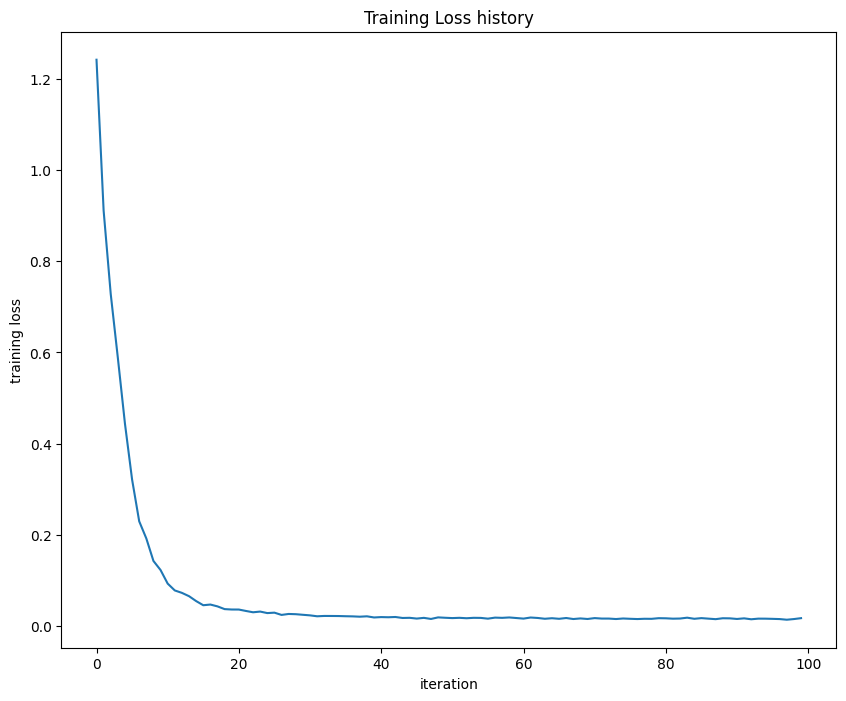

In [ ]:
#final training loss : 0.0171(training loss<0.02)
#Loss 그래프 감소하다가 수렴 -> 학습이 잘 이루어짐

net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up MINST data so we can use it to train a classifier on a real dataset.

In [ ]:
#단순히 데이터를 준비하는 단계

import tensorflow as tf
from tensorflow.keras.datasets import mnist
#MNIST 데이터셋을 TensorFlow에서 로드해오기

def load_mnist_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    #총 70000개의 손글씨 숫자 이미지를 불러오기

    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    x_train = x_train.reshape(-1, 28*28)
    x_test = x_test.reshape(-1, 28*28)

    return x_train, y_train, x_test, y_test

def split_data(x, y, validation_split=0.1):
    split_index = int((1 - validation_split) * len(x))
    x_train, x_val = x[:split_index], x[split_index:]
    y_train, y_val = y[:split_index], y[split_index:]
    return x_train, y_train, x_val, y_val

x_train, y_train, x_test, y_test = load_mnist_data()
x_train, y_train, x_val, y_val = split_data(x_train, y_train, validation_split=0.1)

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (54000, 784), y_train shape: (54000,)
x_val shape: (6000, 784), y_val shape: (6000,)
x_test shape: (10000, 784), y_test shape: (10000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [ ]:
#기본 파라미터(default parameters)를 사용할 경우 0.105가 나옴
#이제 하이퍼파라미터 튜닝을 통해 정확도를 높이자(과제의 핵심)
#Learning rate, hidden_size, num_iters, reg, batch_size를 조정해보자

#Learning rate(모델이 얼마나 빠르게 학습할지를 결정)
#hidden size(은닉층 뉴런 수)
  #값이 작으면 underfitting(과소적합) : 모델이 너무 단순해서 데이터를 제대로 학습하지 못하는 상황
  #값이 크면 overfitting(과적합) : 모델이 너무 복잡해서 훈련 데이터에는 잘 맞지만, 새로운 데이터에는 잘 못 맞추는 상황
#num iters : 학습 반복 횟수
#batch_size : 한 번에 네트워크에 넣는 데이터 수
#reg(정규화 강도.regularization strength)  : 너무 복잡한 모델을 방지하기 위해 파라미터 크기에 패널티를 줌



input_size = 28 * 28
hidden_size = 100
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(x_train, y_train, x_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-1, learning_rate_decay=0.95,
            reg=1e-3, verbose=True)

# Predict on the validation set
val_acc = (net.predict(x_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302586
iteration 100 / 1000: loss 2.296749
iteration 200 / 1000: loss 1.385614
iteration 300 / 1000: loss 0.905372
iteration 400 / 1000: loss 0.474524
iteration 500 / 1000: loss 0.436153
iteration 600 / 1000: loss 0.464872
iteration 700 / 1000: loss 0.457344
iteration 800 / 1000: loss 0.343507
iteration 900 / 1000: loss 0.415152
Validation accuracy:  0.9226666666666666


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.27 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

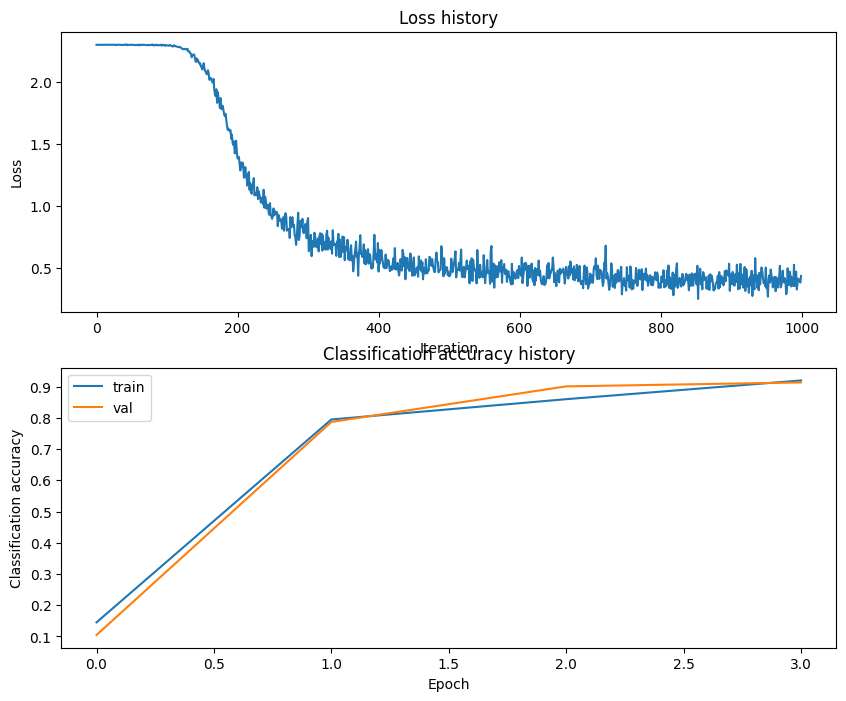

In [ ]:
#First strategy

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

#손실 함수(loss) : 점점 감소해야 함
#학습 정확도(train accuracy : 점점 증가해야함)
#검증 정확도(val accuracy : 증가하다가 어느 순간 멈추거나 감소할 수 있음)
#train과 val의 accuracy 간 차이(gap) 확인:
  #거의 차이 없음 → 모델 용량 부족
  #train은 높은데 val 낮음 → overfitting → reg 높이거나 hidden_size 줄이기

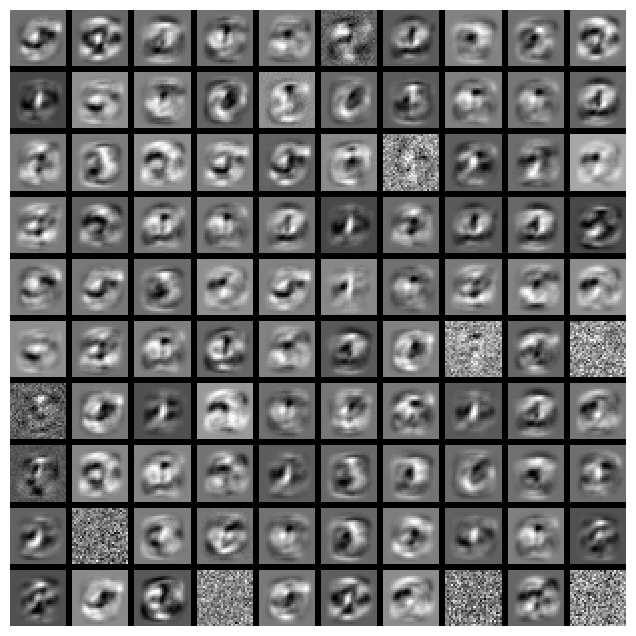

In [ ]:
#Second strategy

#visualize_grid는 weight들을 격자(grid) 형태로 시각화하는 함수
from vis_utils import visualize_grid


# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(28, 28, 1, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 36% on the validation set. Our best network gets over 39% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (39% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

In [ ]:
best_net = None # store the best model into this

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

best_val_acc = 0.0
best_stats = None

# 하이퍼파라미터 조합 설정
learning_rates = [1e-1, 9e-2]
hidden_sizes = [50, 100, 200]
regularization_strengths = [1e-4, 1e-3, 1e-2]
batch_sizes = [100, 200]
num_iters = 1000  # 고정

# 반복문으로 모든 조합 실험
for lr in learning_rates:
    for hs in hidden_sizes:
        for reg in regularization_strengths:
            for bs in batch_sizes:
                print(f"Training with lr={lr}, hidden_size={hs}, reg={reg}, batch_size={bs}")

                # 모델 초기화
                net = TwoLayerNet(input_size=28*28, hidden_size=hs, output_size=10)

                # 학습
                stats = net.train(x_train, y_train, x_val, y_val,
                                  learning_rate=lr,
                                  learning_rate_decay=0.95,
                                  reg=reg,
                                  num_iters=num_iters,
                                  batch_size=bs,
                                  verbose=False)

                # 검증 정확도 측정
                val_acc = (net.predict(x_val) == y_val).mean()
                print("Validation accuracy: ", val_acc)

                # 가장 좋은 모델 저장
                if val_acc > best_val_acc:
                    best_val_acc = val_acc
                    best_net = net
                    best_stats = stats
                    print("==> New best model!")

print("\nBest validation accuracy achieved: ", best_val_acc)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

Training with lr=0.1, hidden_size=50, reg=0.0001, batch_size=100
Validation accuracy:  0.92
==> New best model!
Training with lr=0.1, hidden_size=50, reg=0.0001, batch_size=200
Validation accuracy:  0.9206666666666666
==> New best model!
Training with lr=0.1, hidden_size=50, reg=0.001, batch_size=100
Validation accuracy:  0.9206666666666666
Training with lr=0.1, hidden_size=50, reg=0.001, batch_size=200
Validation accuracy:  0.9213333333333333
==> New best model!
Training with lr=0.1, hidden_size=50, reg=0.01, batch_size=100
Validation accuracy:  0.914
Training with lr=0.1, hidden_size=50, reg=0.01, batch_size=200
Validation accuracy:  0.9155
Training with lr=0.1, hidden_size=100, reg=0.0001, batch_size=100
Validation accuracy:  0.9216666666666666
==> New best model!
Training with lr=0.1, hidden_size=100, reg=0.0001, batch_size=200
Validation accuracy:  0.9225
==> New best model!
Training with lr=0.1, hidden_size=100, reg=0.001, batch_size=100
Validation accuracy:  0.9231666666666667
=

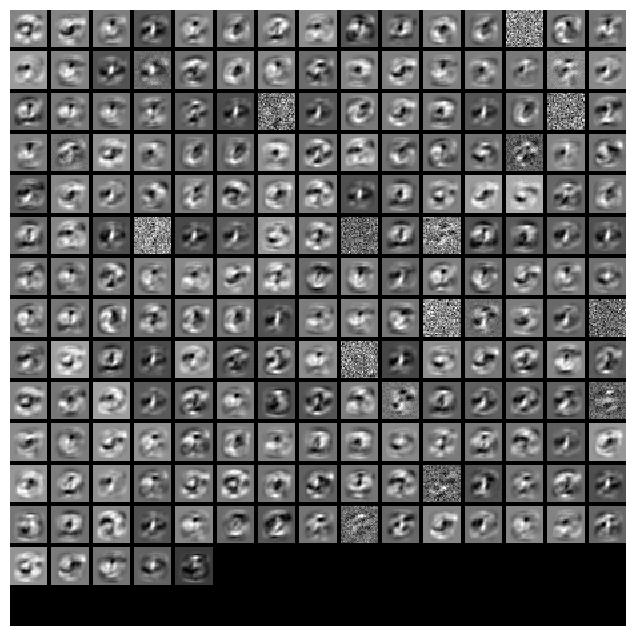

In [ ]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 50%.

In [ ]:
test_acc = (best_net.predict(x_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.9088
